**Deep Learning - Regresi**

**Ali Fatta Maulana - 1103223228**

In [ ]:
pip install gdown

In [ ]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=f488bf14-9c67-440e-8722-01f4fb655172
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:02<00:00, 194MB/s]


'midterm-regresi-dataset.csv'

In [ ]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


In [ ]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import gdown
import os

Preprocessing

In [ ]:
print("\n[INFO] Memuat data ke memori...")
# Gunakan float32 untuk hemat RAM
df = pd.read_csv(file_path, header=None, dtype='float32')

# Memisahkan Fitur (X) dan Target (y)
# Kolom 0 = Tahun (Target), Kolom 1-90 = Fitur Audio
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Hapus df dari memori
del df
import gc
gc.collect()

# Handling Missing Values
if np.isnan(X).any():
    X = np.nan_to_num(X)

# --- PERBAIKAN PENTING: Scaling Target (y) ---
# Ubah bentuk y dari (N,) ke (N, 1) agar bisa di-scale
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Fitur (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling Target (y) -> Ini kunci agar loss tidak meledak
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print(f"[INFO] Data siap. Shape X_train: {X_train_scaled.shape}")


[INFO] Memuat data ke memori...
[INFO] Data siap. Shape X_train: (412276, 90)


Membangun Model Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model(input_dim):
    model = Sequential([
        # Hidden Layer 1
        Dense(256, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden Layer 2
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden Layer 3
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Output Layer (1 Neuron Linear untuk Regresi)
        Dense(1, activation='linear')
    ])

    # Compile Model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

model = build_model(X_train_scaled.shape[1])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,305 (259.00 KB)

 Trainable params: 65,409 (255.50 KB)

 Non-trainable params: 896 (3.50 KB)

Training Model Deep Learning


[INFO] Memulai Training...
Epoch 1/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 1.2068 - mae: 0.7922 - val_loss: 0.6637 - val_mae: 0.5693 - learning_rate: 0.0010
Epoch 2/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6863 - mae: 0.5802 - val_loss: 0.6420 - val_mae: 0.5560 - learning_rate: 0.0010
Epoch 3/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6660 - mae: 0.5702 - val_loss: 0.6352 - val_mae: 0.5566 - learning_rate: 0.0010
Epoch 4/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6572 - mae: 0.5640 - val_loss: 0.6281 - val_mae: 0.5503 - learning_rate: 0.0010
Epoch 5/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6454 - mae: 0.5587 - val_loss: 0.6233 - val_mae: 0.5493 - learning_rate: 0.0010
Epoch 6/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6422 - mae: 0.5557 - val_loss: 0.6191 - val_mae: 0.5419 - learning_rate: 0.0010
Epoch 7/100
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6371 - mae: 0.5526 - val_loss: 0.617

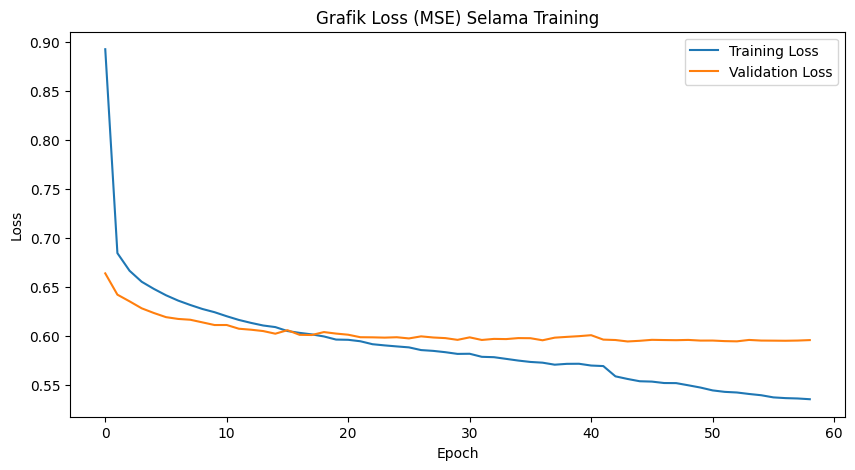

In [ ]:
# Callbacks agar training efisien
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

print("\n[INFO] Memulai Training...")
history = model.fit(
    X_train_scaled, y_train_scaled,  # Training menggunakan target yang sudah di-scale
    validation_split=0.2,            # 20% dari data train dipakai validasi
    epochs=100,
    batch_size=256,                  # Batch besar untuk mempercepat di GPU
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Plot Loss History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss (MSE) Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluasi


[INFO] Sedang melakukan prediksi...
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
HASIL AKHIR (Skala Tahun Asli)
MSE  : 71.6601
RMSE : 8.4652
MAE  : 5.7596 tahun
R²   : 0.3979


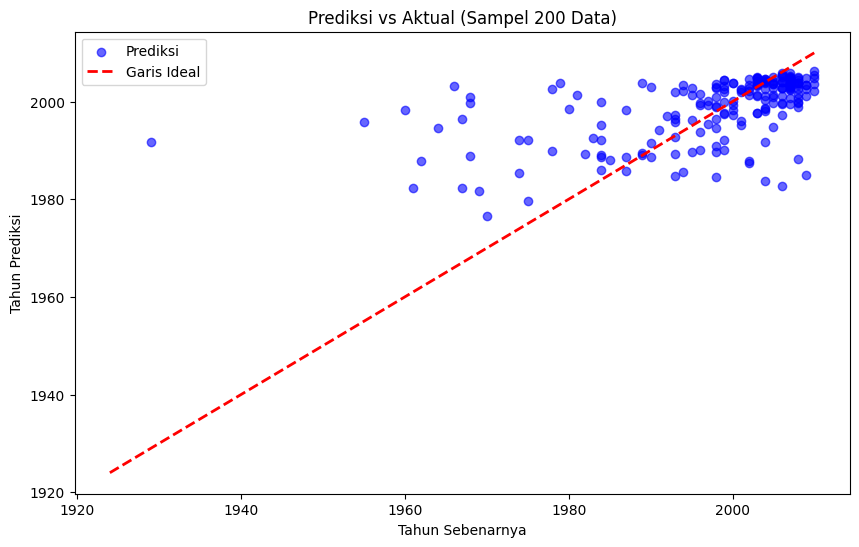

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\n[INFO] Sedang melakukan prediksi...")
# Prediksi data test (Hasil masih dalam skala -1 s.d 1)
y_pred_scaled = model.predict(X_test_scaled)

# Kembalikan ke skala TAHUN ASLI (Inverse Transform)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled) # Atau gunakan y_test awal

# Hitung Metrik Evaluasi
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print("="*40)
print("HASIL AKHIR (Skala Tahun Asli)")
print("="*40)
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f} tahun")
print(f"R²   : {r2:.4f}")
print("="*40)

# Scatter Plot Prediksi vs Aktual
plt.figure(figsize=(10, 6))
# Ambil sampel acak 200 titik agar plot tidak berat
sample_idx = np.random.choice(len(y_test_original), 200, replace=False)
plt.scatter(y_test_original[sample_idx], y_pred_original[sample_idx], alpha=0.6, color='blue', label='Prediksi')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Garis Ideal')
plt.xlabel('Tahun Sebenarnya')
plt.ylabel('Tahun Prediksi')
plt.title('Prediksi vs Aktual (Sampel 200 Data)')
plt.legend()
plt.show()

Penjelasan Model :

Notebook ini mengimplementasikan model Deep Learning untuk menyelesaikan masalah regresi, yaitu memprediksi tahun rilis lagu berdasarkan 90 fitur audio (timbre) dari dataset YearPredictionMSD. Proses dimulai dengan mengunduh dan memuat dataset berukuran besar (sekitar 515.344 baris) tanpa header, di mana kolom pertama adalah target (tahun) dan sisanya adalah fitur. Tahap preprocessing dilakukan secara ketat untuk menghemat memori, meliputi penanganan missing values, pembagian data menjadi 80% training dan 20% testing, serta langkah krusial berupa standardisasi (scaling) menggunakan StandardScaler baik pada fitur input ($X$) maupun target ($y$) agar gradien model tidak meledak saat pelatihan.

Arsitektur model yang dibangun menggunakan TensorFlow/Keras dengan tipe Sequential, terdiri dari tiga hidden layer (masing-masing 256, 128, dan 64 neuron) yang menggunakan fungsi aktivasi ReLU. Setiap layer dilengkapi dengan Batch Normalization untuk stabilitas dan Dropout (0.3 dan 0.2) untuk mencegah overfitting, diakhiri dengan satu neuron output linear untuk regresi. Model dilatih menggunakan optimizer Adam dengan learning rate awal 0.001 dan fungsi loss MSE selama maksimal 100 epoch, dibantu oleh callbacks EarlyStopping dan ReduceLROnPlateau untuk efisiensi waktu pelatihan. Evaluasi akhir dilakukan dengan mengembalikan prediksi ke skala tahun asli (inverse transform), menghasilkan performa dengan Mean Absolute Error (MAE) sekitar 5.76 tahun dan skor R² sebesar 0.3979.